In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
path = "../data/api_data_aadhar_enrolment/*.csv"
files = glob.glob(path)

df_list = [pd.read_csv(file) for file in files]
enrolment_df = pd.concat(df_list, ignore_index=True)

enrolment_df.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [2]:
enrolment_df["total_enrolment"] = (
    enrolment_df["age_0_5"] +
    enrolment_df["age_5_17"] +
    enrolment_df["age_18_greater"]
)

enrolment_df[["age_0_5", "age_5_17", "age_18_greater", "total_enrolment"]].head()


,age_0_5,age_5_17,age_18_greater,total_enrolment
0,11,61,37,109
1,14,33,39,86
2,29,82,12,123
3,62,29,15,106
4,14,16,21,51


In [3]:
state_enrolment = (
    enrolment_df
    .groupby("state")["total_enrolment"]
    .sum()
    .reset_index()
    .sort_values(by="total_enrolment", ascending=False)
)

state_enrolment.head(10)


,state,total_enrolment
45,Uttar Pradesh,1018629
6,Bihar,609585
27,Madhya Pradesh,493970
51,West Bengal,375297
28,Maharashtra,369139
39,Rajasthan,348458
16,Gujarat,280549
5,Assam,230197
23,Karnataka,223235
41,Tamil Nadu,220789


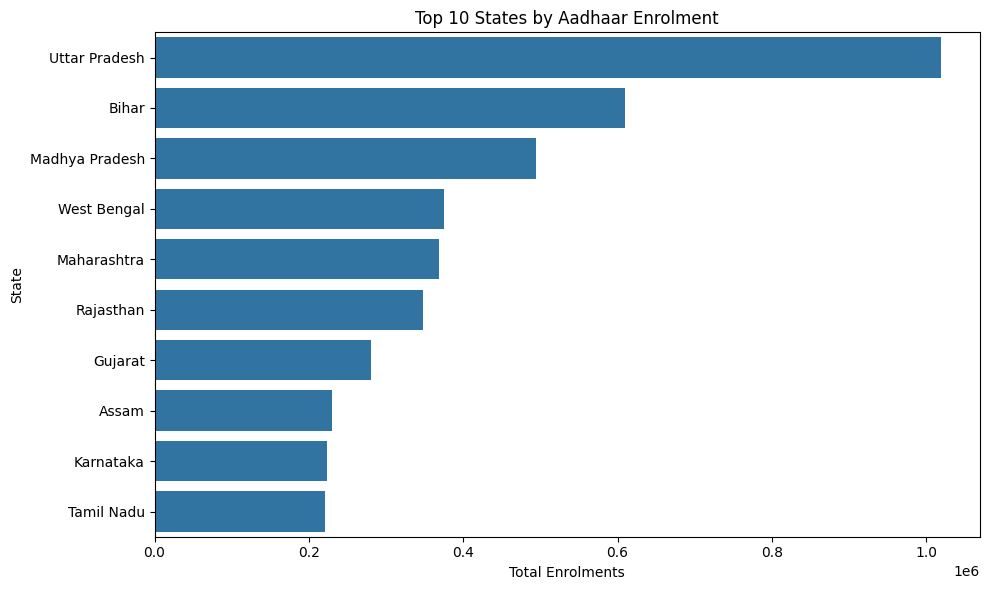

In [4]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=state_enrolment.head(10),
    x="total_enrolment",
    y="state"
)

plt.title("Top 10 States by Aadhaar Enrolment")
plt.xlabel("Total Enrolments")
plt.ylabel("State")
plt.tight_layout()
plt.show()
